이 노트북의 코드에 대한 설명은 QuantileTransformer 글을 참고하세요.

In [1]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy

CPython 3.5.4
IPython 6.2.1

sklearn 0.19.1
numpy 1.13.3
scipy 1.0.0


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer

In [7]:
X, y = make_blobs(n_samples=500, centers=2, random_state=4)

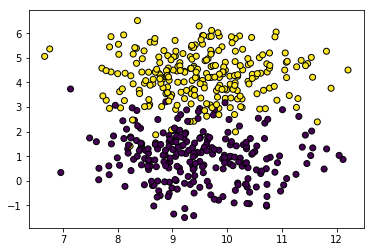

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')
plt.show()

In [11]:
quan = QuantileTransformer(n_quantiles=100)
quan.fit(X)
print(quan.quantiles_.shape)

(100, 2)


In [12]:
quan.quantiles_[:10]

array([[ 6.6657781 , -1.49206421],
       [ 7.61210918, -1.01990633],
       [ 7.78824053, -0.78260893],
       [ 7.85516648, -0.63070686],
       [ 7.9626143 , -0.45347682],
       [ 8.03441051, -0.28360524],
       [ 8.11006792, -0.19981671],
       [ 8.16790251, -0.15642171],
       [ 8.23657329, -0.0964701 ],
       [ 8.27507964, -0.01707259]])

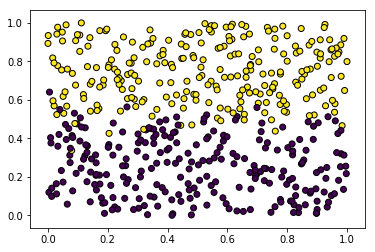

In [13]:
X_quan = quan.transform(X)
plt.scatter(X_quan[:, 0], X_quan[:, 1], c=y, edgecolors='black')
plt.show()

In [19]:
import numpy as np
X0 = .5 * (np.interp(X[:, 0], quan.quantiles_[:, 0], quan.references_)
                          - np.interp(-X[:,0], -quan.quantiles_[:, 0][::-1],
                                      -quan.references_[::-1]))
X1 = .5 * (np.interp(X[:, 1], quan.quantiles_[:, 1], quan.references_)
                          - np.interp(-X[:,1], -quan.quantiles_[:, 1][::-1],
                                      -quan.references_[::-1]))

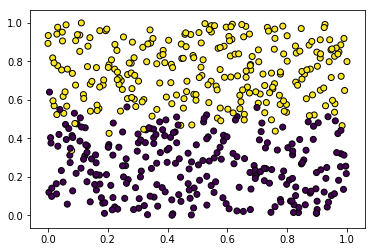

In [20]:
plt.scatter(X0, X1, c=y, edgecolors='black')

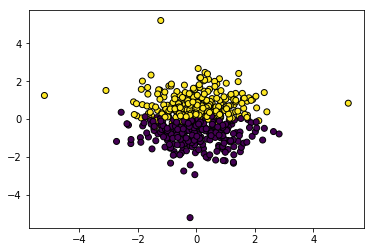

In [21]:
quan = QuantileTransformer(output_distribution='normal', n_quantiles=100, random_state=42)
X_quan = quan.fit_transform(X)
plt.scatter(X_quan[:, 0], X_quan[:, 1], c=y, edgecolors='black')
plt.show()